In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import random
import urllib.request
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')


In [2]:
url = 'https://raw.githubusercontent.com/fifa-19-player-stats/data/master/fifa_raw_data.csv'

In [3]:
df_raw = pd.read_csv(url)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [42]:
basic_data = df_raw[['ID', 'Photo']]
basic_data.head()

,ID,Photo
0,158023,https://cdn.sofifa.org/players/4/19/158023.png
1,20801,https://cdn.sofifa.org/players/4/19/20801.png
2,190871,https://cdn.sofifa.org/players/4/19/190871.png
3,193080,https://cdn.sofifa.org/players/4/19/193080.png
4,192985,https://cdn.sofifa.org/players/4/19/192985.png


In [4]:
df_raw.set_index('Unnamed: 0', inplace=True)

df_raw.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
# for col in df_raw.columns:
#   print(col, df_raw.duplicated(subset=col, keep='first').sum())

# df_raw['Name'].duplicated()

# for i in range(len(df_raw)):
#   if df_raw['Name'].duplicated():
#     print (df_raw[i])

dupes = pd.concat(g for _, g in df_raw.groupby("Name") if len(g) > 1)

dupes

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
9153,198740,A. Acosta,30,https://cdn.sofifa.org/players/4/19/198740.png,Mexico,https://cdn.sofifa.org/flags/83.png,66,66,Tigres U.A.N.L.,https://cdn.sofifa.org/teams/2/light/1970.png,...,68.0,65.0,65.0,66.0,9.0,11.0,14.0,12.0,15.0,€760K
9821,230125,A. Acosta,21,https://cdn.sofifa.org/players/4/19/230125.png,Mexico,https://cdn.sofifa.org/flags/83.png,66,78,U.N.A.M.,https://cdn.sofifa.org/teams/2/light/1881.png,...,58.0,32.0,53.0,56.0,13.0,11.0,9.0,12.0,10.0,€2.2M
2372,222352,A. Ajeti,21,https://cdn.sofifa.org/players/4/19/222352.png,Switzerland,https://cdn.sofifa.org/flags/47.png,74,81,FC Basel 1893,https://cdn.sofifa.org/teams/2/light/896.png,...,80.0,38.0,19.0,17.0,13.0,9.0,6.0,12.0,16.0,€13.6M
8492,203458,A. Ajeti,24,https://cdn.sofifa.org/players/4/19/203458.png,Albania,https://cdn.sofifa.org/flags/1.png,67,71,Grasshopper Club Zürich,https://cdn.sofifa.org/teams/2/light/322.png,...,60.0,67.0,68.0,65.0,11.0,10.0,8.0,11.0,12.0,€1.3M
11321,221772,A. Al Bishi,24,https://cdn.sofifa.org/players/4/19/221772.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,64,69,Al Faisaly,https://cdn.sofifa.org/teams/2/light/112389.png,...,56.0,21.0,26.0,31.0,10.0,12.0,6.0,14.0,16.0,€1M
16618,242140,A. Al Bishi,22,https://cdn.sofifa.org/players/4/19/242140.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,57,66,Al Qadisiyah,https://cdn.sofifa.org/teams/2/light/112391.png,...,38.0,56.0,58.0,58.0,8.0,13.0,8.0,9.0,14.0,€259K
8843,213009,A. Al Ghamdi,23,https://cdn.sofifa.org/players/4/19/213009.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,66,72,Al Ittihad,https://cdn.sofifa.org/teams/2/light/607.png,...,68.0,57.0,15.0,20.0,10.0,8.0,10.0,8.0,15.0,€1.7M
15872,235539,A. Al Ghamdi,23,https://cdn.sofifa.org/players/4/19/235539.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,58,64,Al Raed,https://cdn.sofifa.org/teams/2/light/112392.png,...,48.0,12.0,13.0,14.0,57.0,60.0,49.0,56.0,58.0,€241K
5993,191843,A. Al Khaibari,32,https://cdn.sofifa.org/players/4/19/191843.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,69,69,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,...,65.0,68.0,70.0,67.0,14.0,9.0,14.0,15.0,12.0,€1M


In [6]:
df_raw['Name'].nunique()

17194

In [7]:
df_raw['Club Logo'][0]

'https://cdn.sofifa.org/teams/2/light/241.png'

In [8]:
for col in df_raw.columns:
  print(col, df_raw[col][0])

ID 158023
Name L. Messi
Age 31
Photo https://cdn.sofifa.org/players/4/19/158023.png
Nationality Argentina
Flag https://cdn.sofifa.org/flags/52.png
Overall 94
Potential 94
Club FC Barcelona
Club Logo https://cdn.sofifa.org/teams/2/light/241.png
Value €110.5M
Wage €565K
Special 2202
Preferred Foot Left
International Reputation 5.0
Weak Foot 4.0
Skill Moves 4.0
Work Rate Medium/ Medium
Body Type Messi
Real Face Yes
Position RF
Jersey Number 10.0
Joined Jul 1, 2004
Loaned From nan
Contract Valid Until 2021
Height 5'7
Weight 159lbs
LS 88+2
ST 88+2
RS 88+2
LW 92+2
LF 93+2
CF 93+2
RF 93+2
RW 92+2
LAM 93+2
CAM 93+2
RAM 93+2
LM 91+2
LCM 84+2
CM 84+2
RCM 84+2
RM 91+2
LWB 64+2
LDM 61+2
CDM 61+2
RDM 61+2
RWB 64+2
LB 59+2
LCB 47+2
CB 47+2
RCB 47+2
RB 59+2
Crossing 84.0
Finishing 95.0
HeadingAccuracy 70.0
ShortPassing 90.0
Volleys 86.0
Dribbling 97.0
Curve 93.0
FKAccuracy 94.0
LongPassing 87.0
BallControl 96.0
Acceleration 91.0
SprintSpeed 86.0
Agility 91.0
Reactions 95.0
Balance 95.0
ShotPower 85.0

In [9]:
df_raw.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [10]:
df_raw.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [11]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/aaptecode/buildweek_aaptecode/master/data.csv")
df_raw.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
col1 = ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight','Release Clause']
col2 = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
col3 = ['Name','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

df1 = df_raw[col1]
df2 = df_raw[col2]
df3 = df_raw[col3]

df1.shape, df2.shape, df3.shape

((18207, 28), (18207, 26), (18207, 35))

In [13]:
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M


In [14]:
df1.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Release Clause               1564
dtype: int64

In [15]:
club_col = ['Club', 'Club Logo']
logo_df = df_raw[club_col].copy()
logo_df.head()

,Club,Club Logo
0,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png
1,Juventus,https://cdn.sofifa.org/teams/2/light/45.png
2,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png
3,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png
4,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png


In [16]:
logo_df[logo_df.Club.isnull()]

,Club,Club Logo
452,NaN,https://cdn.sofifa.org/flags/52.png
538,NaN,https://cdn.sofifa.org/flags/46.png
568,NaN,https://cdn.sofifa.org/flags/40.png
677,NaN,https://cdn.sofifa.org/flags/40.png
874,NaN,https://cdn.sofifa.org/flags/40.png
953,NaN,https://cdn.sofifa.org/flags/38.png
997,NaN,https://cdn.sofifa.org/flags/40.png
1008,NaN,https://cdn.sofifa.org/flags/108.png
1120,NaN,https://cdn.sofifa.org/flags/58.png
1271,NaN,https://cdn.sofifa.org/flags/58.png


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 26 columns):
LS     16122 non-null object
ST     16122 non-null object
RS     16122 non-null object
LW     16122 non-null object
LF     16122 non-null object
CF     16122 non-null object
RF     16122 non-null object
RW     16122 non-null object
LAM    16122 non-null object
CAM    16122 non-null object
RAM    16122 non-null object
LM     16122 non-null object
LCM    16122 non-null object
CM     16122 non-null object
RCM    16122 non-null object
RM     16122 non-null object
LWB    16122 non-null object
LDM    16122 non-null object
CDM    16122 non-null object
RDM    16122 non-null object
RWB    16122 non-null object
LB     16122 non-null object
LCB    16122 non-null object
CB     16122 non-null object
RCB    16122 non-null object
RB     16122 non-null object
dtypes: object(26)
memory usage: 3.6+ MB


In [18]:
df2.isnull().sum()

LS     2085
ST     2085
RS     2085
LW     2085
LF     2085
CF     2085
RF     2085
RW     2085
LAM    2085
CAM    2085
RAM    2085
LM     2085
LCM    2085
CM     2085
RCM    2085
RM     2085
LWB    2085
LDM    2085
CDM    2085
RDM    2085
RWB    2085
LB     2085
LCB    2085
CB     2085
RCB    2085
RB     2085
dtype: int64

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 35 columns):
Name               18207 non-null object
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength           18159 non-null float64
LongShots          18159 non-null float64
Aggression

In [20]:
df3.isnull().sum()

Name                0
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [21]:
df3.columns

Index(['Name', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [22]:
df3 = df3.fillna(0)  # Filled null values with zeros. There were only 48 null values
df3.isnull().sum() 

Name               0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [23]:
df3.head()

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [24]:
df3.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,49.603065,45.430823,52.160268,58.531993,42.795903,55.225023,47.046466,42.750151,52.572966,58.215576,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,18.516769,19.639462,17.562941,14.985392,17.807529,19.097679,18.529559,17.593545,15.544468,16.931249,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,30.000000,44.000000,53.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,56.000000,64.000000,69.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [34]:
df3.groupby(['Name', 'Penalties'])['Penalties'].mean()

Name              Penalties
A. Abang          54.0         54.0
A. Abdellaoui     45.0         45.0
A. Abdennour      51.0         51.0
A. Abdi           66.0         66.0
A. Abdu Jaber     68.0         68.0
A. Abdulhameed    10.0         10.0
A. Abedzadeh      11.0         11.0
A. Abeid          40.0         40.0
A. Ablet          58.0         58.0
A. Abrashi        54.0         54.0
A. Abruscia       0.0           0.0
A. Absalem        41.0         41.0
A. Accardi        40.0         40.0
A. Acevedo        38.0         38.0
A. Acosta         53.0         53.0
                  65.0         65.0
A. Acquah         60.0         60.0
A. Adam           68.0         68.0
A. Addai          64.0         64.0
A. Ademi          46.0         46.0
A. Ademoglu       59.0         59.0
A. Adetula        50.0         50.0
A. Adnan          66.0         66.0
A. Adomah         68.0         68.0
A. Adouyev        52.0         52.0
A. Affane         66.0         66.0
A. Agouda         58.0         58.0


In [35]:
df3.groupby(['Name', 'Dribbling'])['Dribbling'].mean()

Name              Dribbling
A. Abang          56.0         56.0
A. Abdellaoui     39.0         39.0
A. Abdennour      48.0         48.0
A. Abdi           70.0         70.0
A. Abdu Jaber     61.0         61.0
A. Abdulhameed    6.0           6.0
A. Abedzadeh      10.0         10.0
A. Abeid          52.0         52.0
A. Ablet          59.0         59.0
A. Abrashi        60.0         60.0
A. Abruscia       0.0           0.0
A. Absalem        61.0         61.0
A. Accardi        42.0         42.0
A. Acevedo        28.0         28.0
A. Acosta         64.0         64.0
                  71.0         71.0
A. Acquah         76.0         76.0
A. Adam           62.0         62.0
A. Addai          49.0         49.0
A. Ademi          69.0         69.0
A. Ademoglu       64.0         64.0
A. Adetula        66.0         66.0
A. Adnan          77.0         77.0
A. Adomah         74.0         74.0
A. Adouyev        72.0         72.0
A. Affane         65.0         65.0
A. Agouda         45.0         45.0


In [54]:
#Grouping by Nationality
#Creating a dictionary called continent to map the countries to their continents
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

#Creating a function that assigns continent to each country
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

#Applying the function and creating the continent column
df1['Continent'] = df1['Nationality'].apply(lambda x: find_continent(x, continents))

#Selecting the top 1000 players from the dataset based on the Overall
top_1000 = df1.sort_values("Overall", ascending=False).reset_index().head(1000)[["Name", "Nationality", "Continent", "Overall", "Club"]]
top_1000

,Name,Nationality,Continent,Overall,Club
0,L. Messi,Argentina,South America,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,Europe,94,Juventus
2,Neymar Jr,Brazil,South America,92,Paris Saint-Germain
3,De Gea,Spain,Europe,91,Manchester United
4,K. De Bruyne,Belgium,Europe,91,Manchester City
5,E. Hazard,Belgium,Europe,91,Chelsea
6,L. Modrić,Croatia,Europe,91,Real Madrid
7,L. Suárez,Uruguay,South America,91,FC Barcelona
8,Sergio Ramos,Spain,Europe,91,Real Madrid
9,D. Godín,Uruguay,South America,90,Atlético Madrid


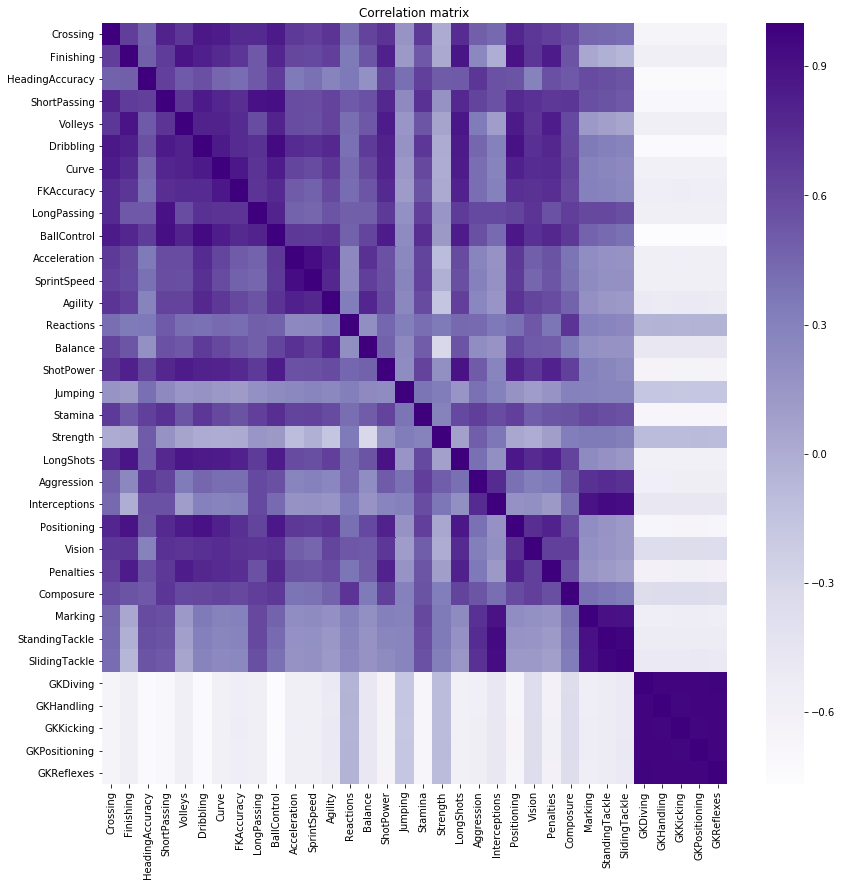

In [60]:
for i in df3:
    df3[i] = list(df3[i])
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
ax = sns.heatmap(df3.corr(),cmap = "Purples").set_title('Correlation matrix')

In [62]:
top10 = list(df1['Nationality'].value_counts().head(10).index)
top10

['England',
 'Germany',
 'Spain',
 'Argentina',
 'France',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

In [64]:
d = df1.query('Nationality in @top10')

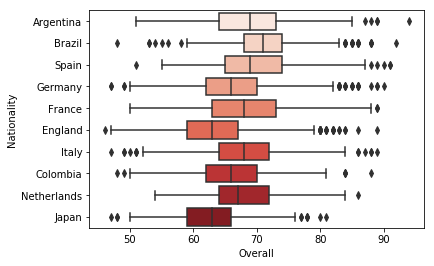

In [66]:
box_overall = sns.boxplot(data = d, y = 'Nationality', x = 'Overall',palette = 'Reds')

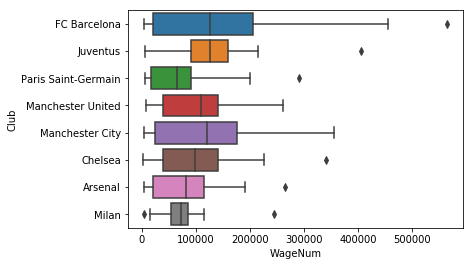

In [77]:
player = pd.read_csv('https://raw.githubusercontent.com/fifa-19-player-stats/data/master/fifa_raw_data.csv',
                     index_col = 0)
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

player['ValueNum'] = player['Value'].apply(lambda x: str2number(x))
player['WageNum'] = player['Wage'].apply(lambda x: str2number(x))

clubs = ['FC Barcelona', 'Real Madrid CF', 'Paris Saint-Germain', 'FC Bayern Munich', 'Manchester United',
         'Chelsea', 'Juventus', 'Arsenal', 'Manchester City', 'Milan']

c = player.query('Club in @clubs')

wage1 = sns.boxplot(data = c, y = 'Club', x = 'WageNum')

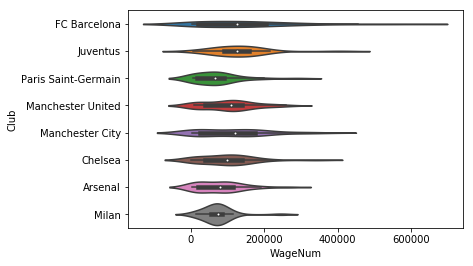

In [78]:
wage2 = sns.violinplot(data = c, y = 'Club', x = 'WageNum')